<a href="https://colab.research.google.com/github/KlymentievMaksym/IntelOb/blob/main/Lab3/Lab3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# from urllib.request import urlopen
# test_images = urlopen("https://web.mit.edu/torralba/www/TestImages.txt").read().decode('utf-8').split()
# train_images = urlopen("https://web.mit.edu/torralba/www/TrainImages.txt").read().decode('utf-8').split()

from os import path, listdir

import cv2
# from PIL import Image

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
layers = tf.keras.layers

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# tf.config.optimizer.set_jit(True)


In [38]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Read Data

In [39]:
size = (128, 128)
batch_size = 128

path  = "./drive/MyDrive/Data/Images"
# path  = "./Data/Images"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    path,
    target_size=size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 12496 images belonging to 67 classes.
Found 3094 images belonging to 67 classes.


In [40]:
# data = []
# labels = []

# size = (128, 128)

# # path  = "./app/Lab3/Data/Images"
# path  = "./drive/MyDrive/Data/Images"
# # path  = "./Data/Images"

# images = listdir(path)
# # subplot_size = len(images)

# # plt.figure(figsize=(20, 20))
# # plt.axis('off')
# # fig, ax = plt.subplots(subplot_size//10 + 1, 10)

# for category in tqdm(images):
#     for image in listdir(f"{path}/{category}"):
#         try:
#             filepath = f"{path}/{category}/{image}"
#             # filepath
#             img = cv2.imread(filepath)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             img = cv2.resize(img, size)
#             img = img / 255.0
#             # data.append(img)
#             # labels.append(category)
#         except Exception as e:
#             # pass
#             print(filepath, e)  #, img
#             # try:
#             #     filepath = path.join(f"./Data/Images/{category}/{image}")
#             #     img = Image.open(filepath)
#             #     img = img.resize(size)
#             #     img = np.array(img)
#             #     img = img / 255.0
#             #     data.append(img)
#             #     labels.append(category)
#             # except Exception as e:
#             #     print(filepath, e, img)

#     # ax[images.index(category)//10, images.index(category)%10].imshow(data[-1])
#     # ax[images.index(category)//10, images.index(category)%10].set_title(category)


# plt.show()
# data = np.array(data)
# labels = np.array(labels)

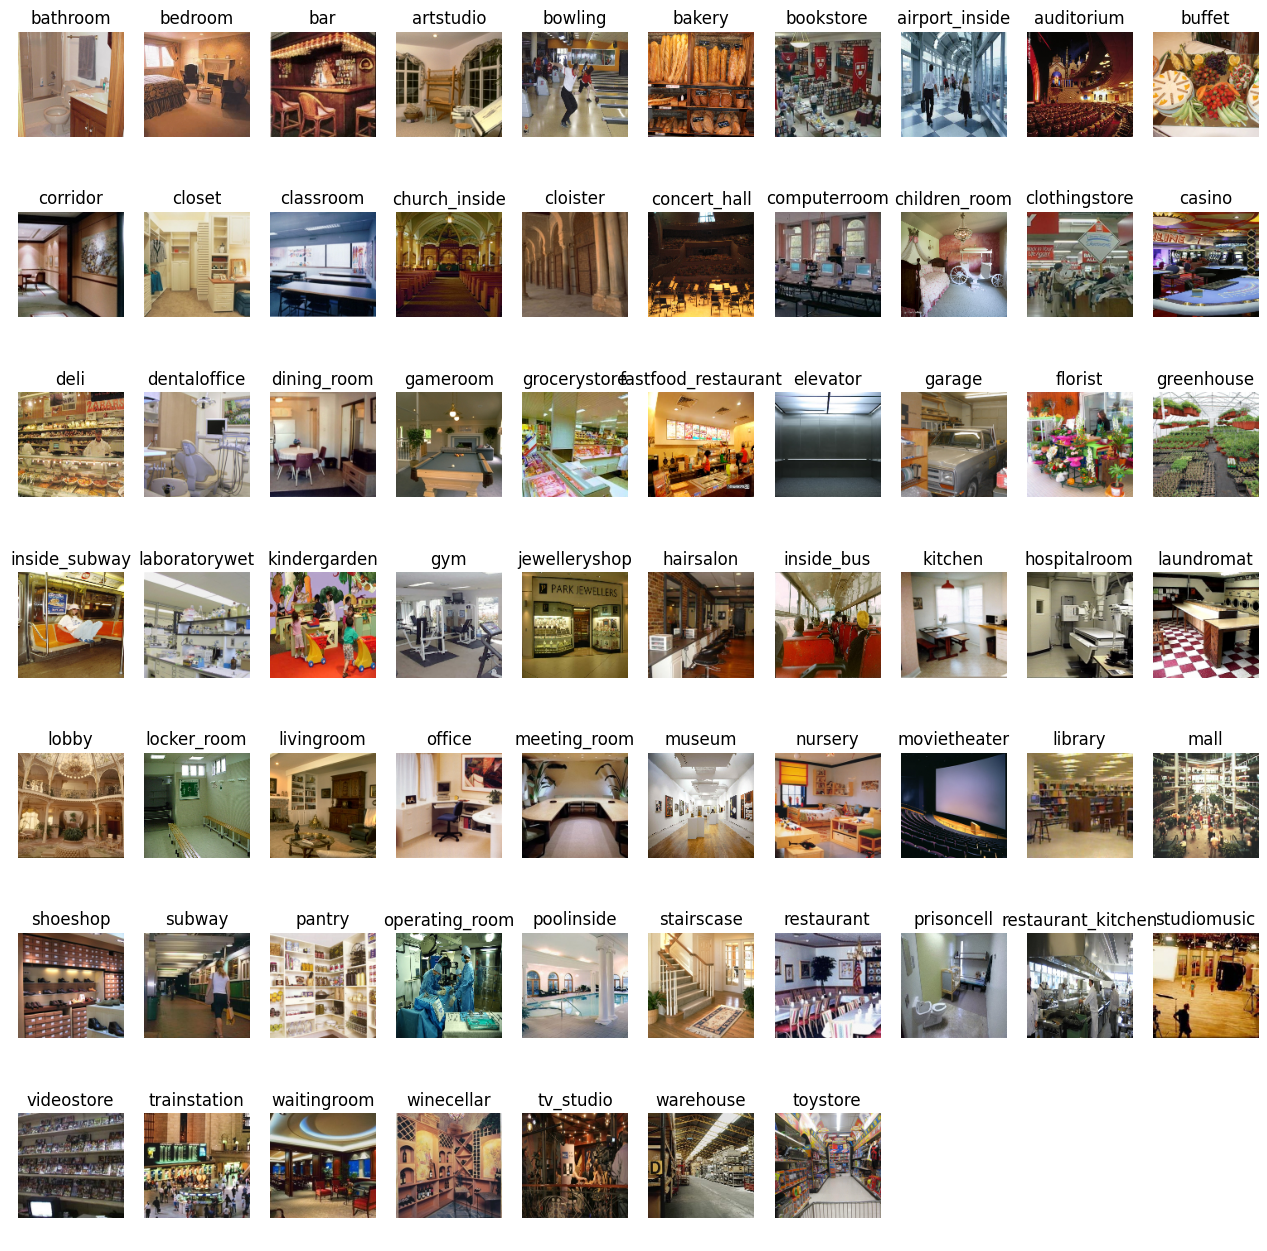

In [41]:
images = listdir(path)
subplot_size = len(images)

fig, ax = plt.subplots(subplot_size//10 + 1, 10, figsize=(16, 16))
plt.axis('off')

for axe in ax:
    for axee in axe:
        axee.axis('off')


for category in images:
    filepath = path + "/" + category + "/" + listdir(f"{path}/{category}")[0]
    # print(filepath)
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    img = img / 255.0
    ax[images.index(category) // 10, images.index(category) % 10].imshow(img)
    ax[images.index(category) // 10, images.index(category) % 10].set_title(category)
plt.show()


In [42]:
# labels.shape

In [43]:
# data.shape

# Transform Data

In [44]:
# string = labels.copy()
# string = string[sorted(np.unique(string, return_index=True)[1])]
# str_to_int = dict(zip(string, range(len(string))))
# int_to_str = dict(zip(range(len(string)), string))


In [45]:
# labels


In [46]:
# def transform(x):
#     return str_to_int[x]
# if labels.dtype == "<U19":
#     labels = np.array(list(map(transform, labels)))
# labels

In [47]:
# data = data[...,::-1]

# Split Data

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
# y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [49]:
# integer = np.random.randint(0, X_train.shape[0])
# plt.imshow(X_train[integer])
# plt.title(int_to_str[np.argmax(y_train[integer])])
# plt.show()

# Help Fuctions

In [50]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

# def predict_random(model, data_x=X_test, data_y=y_test):
#     choose = np.random.randint(0, data_x.shape[0])
#     plt.imshow(data_x[choose])
#     predictions = model.predict(data_x)
#     # plt.title(f'Predicted Object: {np.argmax(predictions[choose]) + 1} | Real Object: {np.argmax(data_y[choose]) + 1}')
#     # plt.title(f'Predicted Object: {int_to_str[np.argmax(predictions[choose])]} | Real Object: {int_to_str[np.argmax(data_y[choose])]}')
#     plt.title(f'Predicted Object: {[np.argmax(predictions[choose])]} | Real Object: {[np.argmax(data_y[choose])]}')

def predict(model, batch_size, epochs=40):
    # history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    history = model.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=val_generator)
    display_history(history, ['loss', 'val_loss'], "Loss")
    display_history(history, ['accuracy', 'val_accuracy'], "Accuracy")
    model.evaluate(val_generator)
    # predict_random(model, X_test, y_test)

# Baseline

In [56]:
model_baseline = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_baseline.summary()
model_baseline.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_baseline, batch_size, 40)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,227 (2.49 MB)

 Trainable params: 651,331 (2.48 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - Top2: 0.0935 - accuracy: 0.0508 - loss: 4.5142

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - Top2: 0.0937 - accuracy: 0.0509 - loss: 4.5099 - val_Top2: 0.0582 - val_accuracy: 0.0126 - val_loss: 6.6035
Epoch 2/40
18/98 ━━━━━━━━━━━━━━━━━━━━ 1:05 820ms/step - Top2: 0.1695 - accuracy: 0.0831 - loss: 3.8007

KeyboardInterrupt: 

# More Conv2D

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 552,163 (2.11 MB)

 Trainable params: 552,035 (2.11 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 79s 490ms/step - Top2: 0.0752 - accuracy: 0.0422 - loss: 4.5881 - val_Top2: 0.0938 - val_accuracy: 0.0409 - val_loss: 9.8107
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 77s 494ms/step - Top2: 0.1484 - accuracy: 0.0848 - loss: 3.8836 - val_Top2: 0.0741 - val_accuracy: 0.0353 - val_loss: 7.0671
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 471ms/step - Top2: 0.1668 - accuracy: 0.0955 - loss: 3.7479 - val_Top2: 0.1363 - val_accuracy: 0.0733 - val_loss: 4.2257
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 74s 471ms/step - Top2: 0.1891 - accuracy: 0.1072 - loss: 3.6667 - val_Top2: 0.2281 - val_accuracy: 0.1379 - val_loss: 3.5817
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 74s 473ms/step - Top2: 0.2116 - accuracy: 0.1240 - loss: 3.5583 - val_Top2: 0.2224 - val_accuracy: 0.1415 - val_loss: 3.5198
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 76s 487ms/step - Top2: 0.2350 - accuracy: 0.1444 - loss: 3.4787 - val_Top2: 0.2725 - val_accuracy: 0.1772 - val_loss: 3.3932
Epoch 7/40

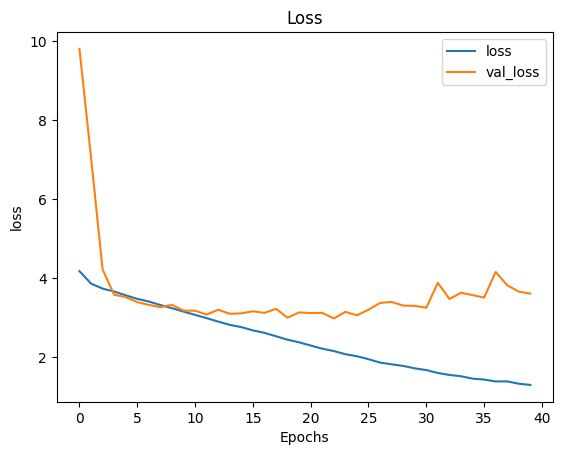

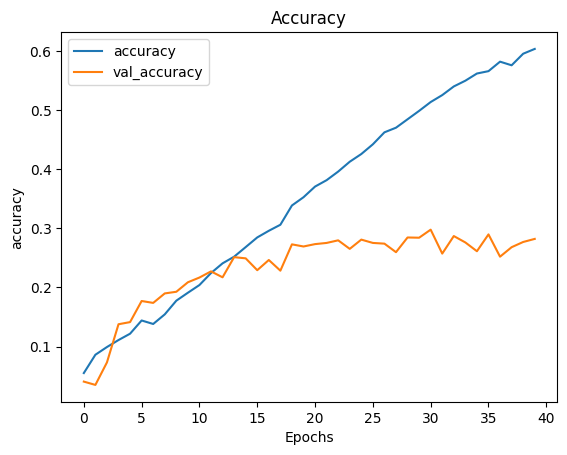

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - Top2: 0.3768 - accuracy: 0.2451 - loss: 3.6327
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


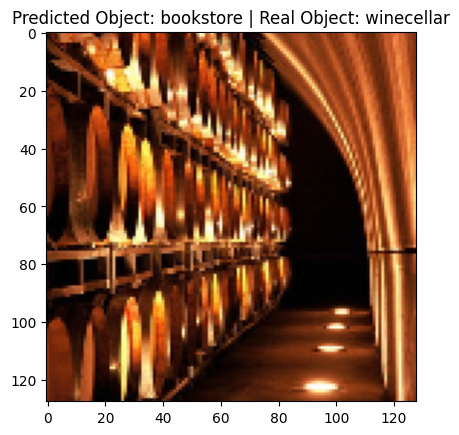

In [ ]:
model_more_conv = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_more_conv.summary()
model_more_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_more_conv, batch_size, 40)

# Even more Conv2D

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,019 (273.51 KB)

 Trainable params: 69,827 (272.76 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 79s 486ms/step - Top2: 0.0989 - accuracy: 0.0580 - loss: 4.4232 - val_Top2: 0.0325 - val_accuracy: 0.0132 - val_loss: 7.2425
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 467ms/step - Top2: 0.1901 - accuracy: 0.1053 - loss: 3.6161 - val_Top2: 0.0561 - val_accuracy: 0.0144 - val_loss: 8.3714
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 465ms/step - Top2: 0.2347 - accuracy: 0.1381 - loss: 3.4377 - val_Top2: 0.0822 - val_accuracy: 0.0425 - val_loss: 5.5890
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 72s 459ms/step - Top2: 0.2641 - accuracy: 0.1608 - loss: 3.2906 - val_Top2: 0.2377 - val_accuracy: 0.1539 - val_loss: 3.5151
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 72s 463ms/step - Top2: 0.2918 - accuracy: 0.1887 - loss: 3.1663 - val_Top2: 0.3014 - val_accuracy: 0.2020 - val_loss: 3.1529
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 466ms/step - Top2: 0.3273 - accuracy: 0.2115 - loss: 3.0338 - val_Top2: 0.2978 - val_accuracy: 0.2004 - val_loss: 3.3732
Epoch 7/40

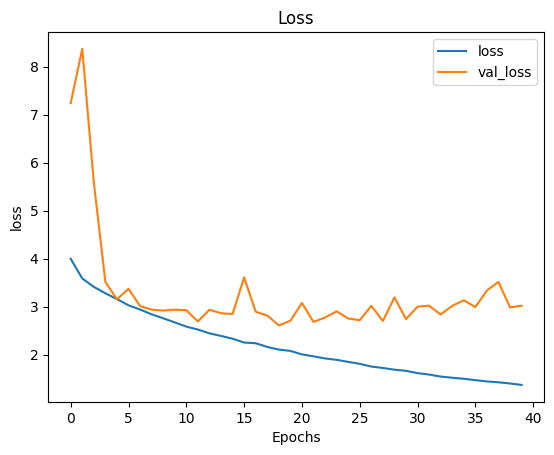

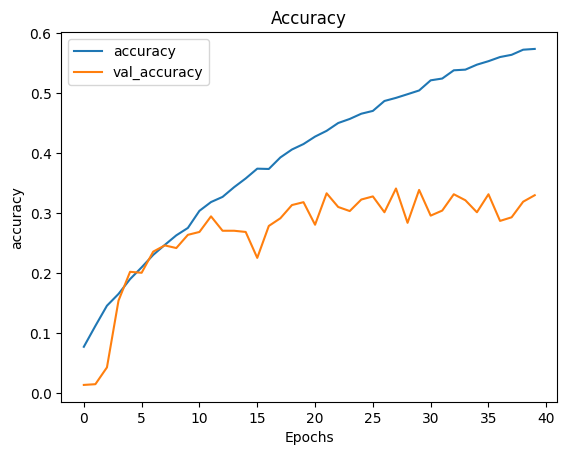

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - Top2: 0.4589 - accuracy: 0.3051 - loss: 2.9885
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


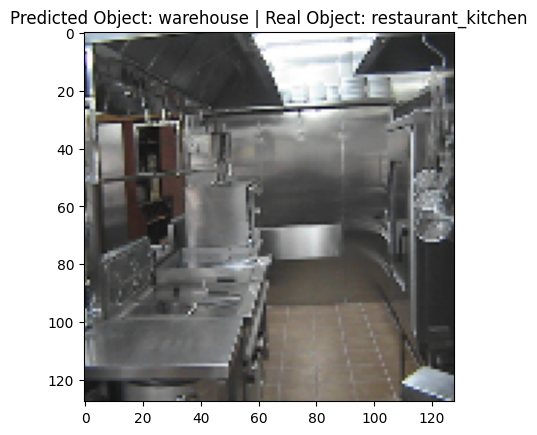

In [ ]:
model_even_more_conv = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_even_more_conv.summary()
model_even_more_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_even_more_conv, batch_size, 40)

# More Conv2D with more Filters

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,691 (948.01 KB)

 Trainable params: 242,243 (946.26 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 526ms/step - Top2: 0.1020 - accuracy: 0.0565 - loss: 4.4775 - val_Top2: 0.0625 - val_accuracy: 0.0132 - val_loss: 12.0063
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 79s 508ms/step - Top2: 0.1732 - accuracy: 0.1011 - loss: 3.7536 - val_Top2: 0.0497 - val_accuracy: 0.0132 - val_loss: 13.9985
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 78s 500ms/step - Top2: 0.2224 - accuracy: 0.1288 - loss: 3.5337 - val_Top2: 0.0938 - val_accuracy: 0.0509 - val_loss: 5.7350
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 80s 514ms/step - Top2: 0.2505 - accuracy: 0.1466 - loss: 3.4001 - val_Top2: 0.2277 - val_accuracy: 0.1547 - val_loss: 3.7932
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 78s 503ms/step - Top2: 0.2770 - accuracy: 0.1695 - loss: 3.2696 - val_Top2: 0.2754 - val_accuracy: 0.1820 - val_loss: 3.3824
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 78s 499ms/step - Top2: 0.3191 - accuracy: 0.1953 - loss: 3.1177 - val_Top2: 0.3371 - val_accuracy: 0.2184 - val_loss: 3.0908
Epoch 7/

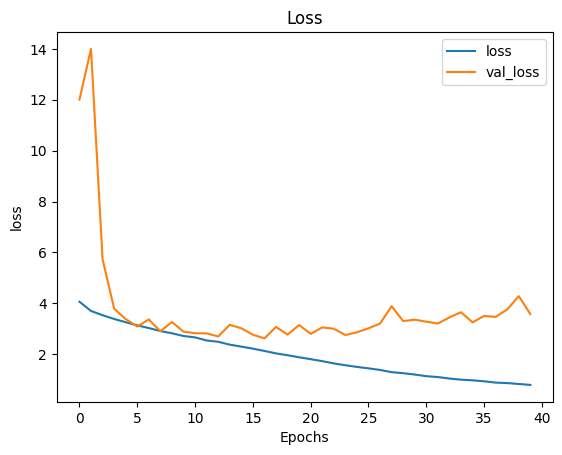

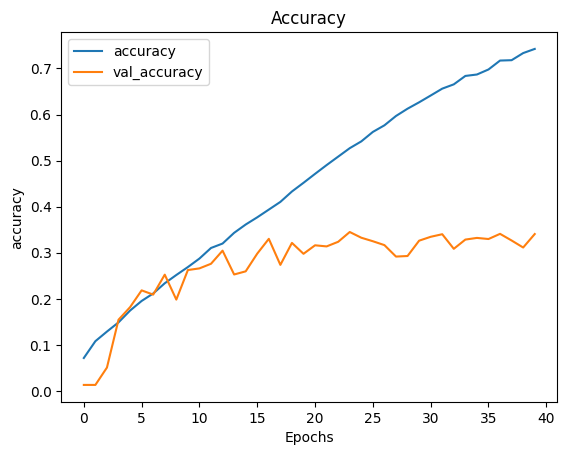

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - Top2: 0.4652 - accuracy: 0.3335 - loss: 3.6304
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step


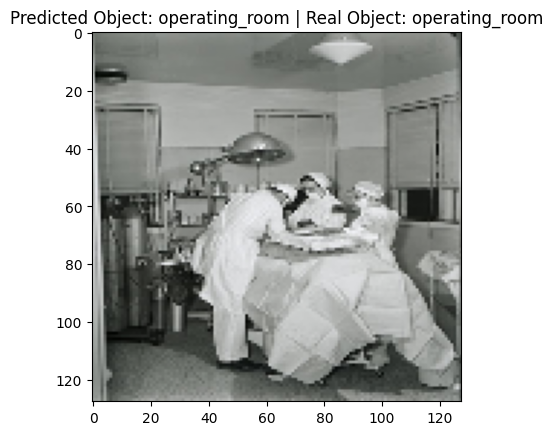

In [ ]:
model_more_conv_filters = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_more_conv_filters.summary()
model_more_conv_filters.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_more_conv_filters, batch_size, 40)

# Lesser MaxPooling2D

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,208,771 (8.43 MB)

 Trainable params: 2,208,323 (8.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - Top2: 0.0728 - accuracy: 0.0398 - loss: 5.3192 - val_Top2: 0.0405 - val_accuracy: 0.0096 - val_loss: 19.6466
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - Top2: 0.0911 - accuracy: 0.0453 - loss: 4.1370 - val_Top2: 0.0413 - val_accuracy: 0.0152 - val_loss: 9.8410
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - Top2: 0.1037 - accuracy: 0.0530 - loss: 4.0763 - val_Top2: 0.1186 - val_accuracy: 0.0705 - val_loss: 4.0726
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - Top2: 0.1113 - accuracy: 0.0558 - loss: 4.0222 - val_Top2: 0.1379 - val_accuracy: 0.0794 - val_loss: 3.9806
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - Top2: 0.1144 - accuracy: 0.0634 - loss: 3.9826 - val_Top2: 0.1142 - val_accuracy: 0.0609 - val_loss: 4.0027
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - Top2: 0.1229 - accuracy: 0.0669 - loss: 3.9447 - val_Top2: 0.1575 - val_accuracy: 0.0850 - val_loss: 3.8667
Epoch 7/40
156/156 ━━

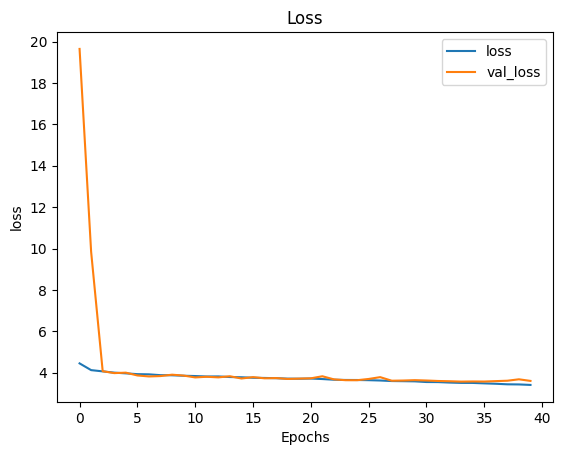

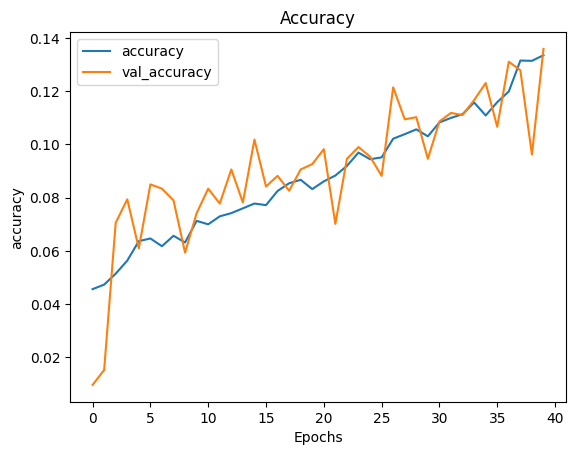

98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - Top2: 0.2200 - accuracy: 0.1384 - loss: 3.6266
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step


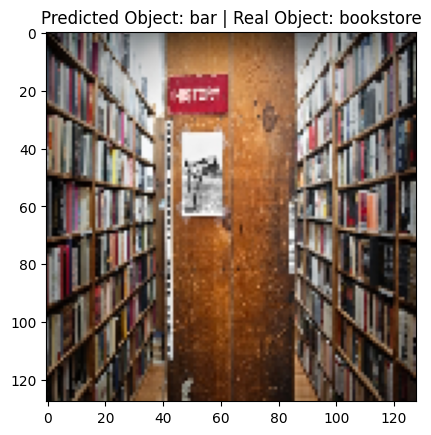

In [ ]:
model_less_pool = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_less_pool.summary()
model_less_pool.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_less_pool, batch_size, 40)

# Revert Lesser MaxPooling2D

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,208,771 (8.43 MB)

 Trainable params: 2,208,323 (8.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 90s 546ms/step - Top2: 0.0969 - accuracy: 0.0532 - loss: 4.3334 - val_Top2: 0.0645 - val_accuracy: 0.0413 - val_loss: 8.1421
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 84s 537ms/step - Top2: 0.1812 - accuracy: 0.1094 - loss: 3.7696 - val_Top2: 0.1130 - val_accuracy: 0.0689 - val_loss: 6.9416
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 529ms/step - Top2: 0.2164 - accuracy: 0.1233 - loss: 3.5941 - val_Top2: 0.1527 - val_accuracy: 0.0874 - val_loss: 4.3784
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 82s 527ms/step - Top2: 0.2462 - accuracy: 0.1490 - loss: 3.4275 - val_Top2: 0.2621 - val_accuracy: 0.1491 - val_loss: 3.3984
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 83s 530ms/step - Top2: 0.2916 - accuracy: 0.1800 - loss: 3.2311 - val_Top2: 0.2116 - val_accuracy: 0.1299 - val_loss: 4.0603
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 84s 540ms/step - Top2: 0.3239 - accuracy: 0.2011 - loss: 3.0972 - val_Top2: 0.3259 - val_accuracy: 0.2112 - val_loss: 3.1182
Epoch 7/40

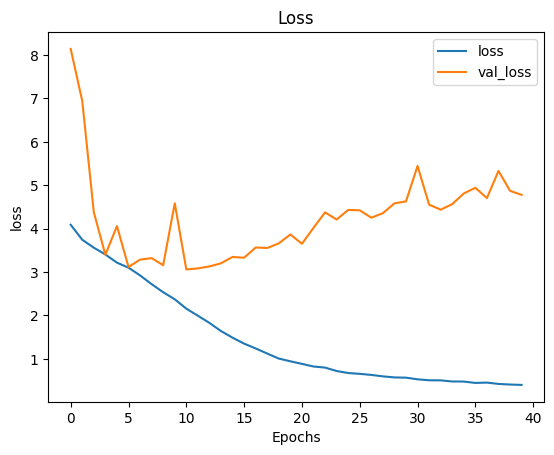

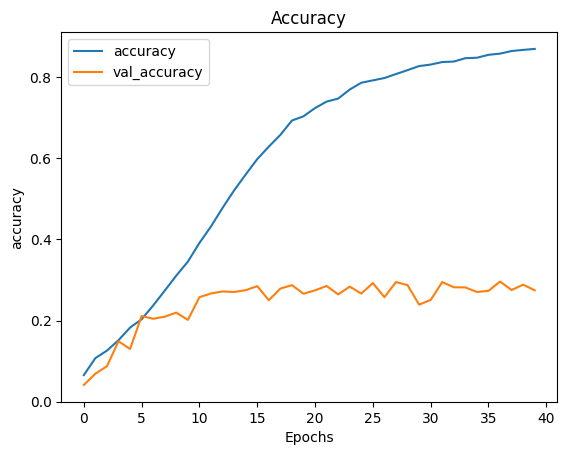

98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - Top2: 0.3618 - accuracy: 0.2544 - loss: 4.9184
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step


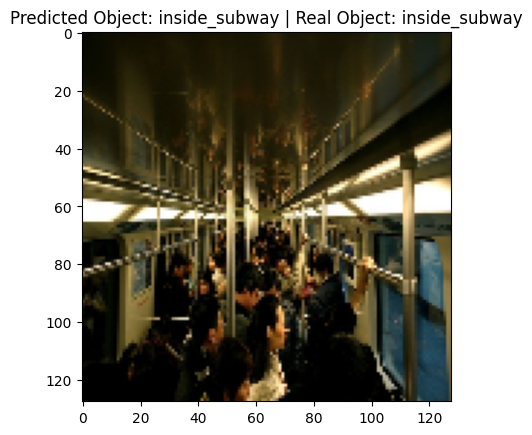

In [ ]:
model_less_pool_r = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_less_pool_r.summary()
model_less_pool_r.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_less_pool_r, batch_size, 40)

# Revert More Conv2D with more Filters

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,979 (574.14 KB)

 Trainable params: 146,531 (572.39 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 4190s 27s/step - Top2: 0.1014 - accuracy: 0.0532 - loss: 4.3741 - val_Top2: 0.0545 - val_accuracy: 0.0132 - val_loss: 6.5433
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - Top2: 0.2093 - accuracy: 0.1160 - loss: 3.5875 - val_Top2: 0.0525 - val_accuracy: 0.0132 - val_loss: 7.6208
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - Top2: 0.2352 - accuracy: 0.1384 - loss: 3.4108 - val_Top2: 0.0673 - val_accuracy: 0.0257 - val_loss: 6.3890
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - Top2: 0.2760 - accuracy: 0.1687 - loss: 3.2515 - val_Top2: 0.3010 - val_accuracy: 0.1920 - val_loss: 3.2188
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - Top2: 0.3164 - accuracy: 0.2068 - loss: 3.0880 - val_Top2: 0.3158 - val_accuracy: 0.2060 - val_loss: 3.1627
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - Top2: 0.3411 - accuracy: 0.2173 - loss: 2.9767 - val_Top2: 0.3246 - val_accuracy: 0.2180 - val_loss: 3.1938
Epoch 7/40
156/156 ━

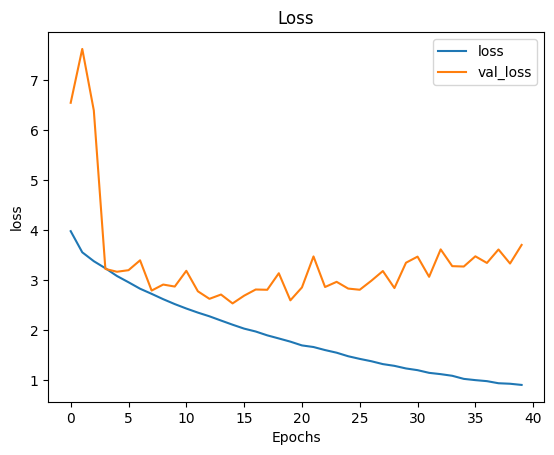

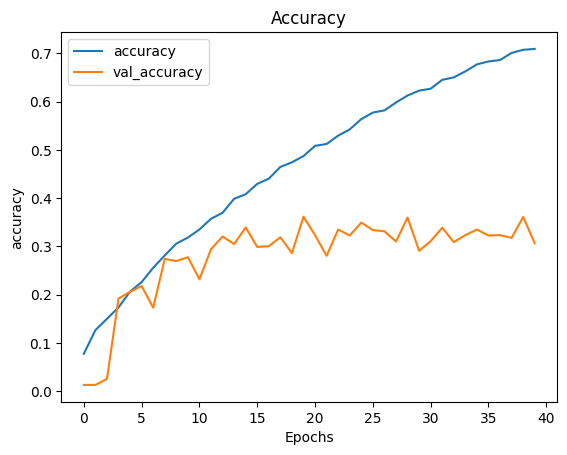

98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - Top2: 0.4072 - accuracy: 0.2791 - loss: 3.7629
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step


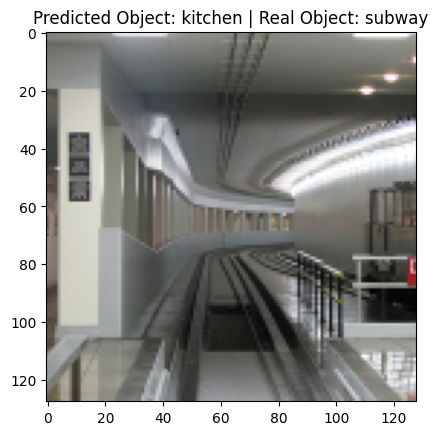

In [ ]:
model_more_conv_filters_r = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_more_conv_filters_r.summary()
model_more_conv_filters_r.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_more_conv_filters_r, batch_size, 40)

# Slower Learning Rate

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,208,771 (8.43 MB)

 Trainable params: 2,208,323 (8.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - Top2: 0.0608 - accuracy: 0.0328 - loss: 4.7716 - val_Top2: 0.0128 - val_accuracy: 0.0048 - val_loss: 5.9210
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - Top2: 0.1244 - accuracy: 0.0701 - loss: 3.9870 - val_Top2: 0.0661 - val_accuracy: 0.0305 - val_loss: 5.1436
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - Top2: 0.1576 - accuracy: 0.0984 - loss: 3.8491 - val_Top2: 0.1828 - val_accuracy: 0.1050 - val_loss: 3.9009
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - Top2: 0.2023 - accuracy: 0.1250 - loss: 3.7166 - val_Top2: 0.2449 - val_accuracy: 0.1587 - val_loss: 3.6026
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - Top2: 0.2299 - accuracy: 0.1423 - loss: 3.5740 - val_Top2: 0.2637 - val_accuracy: 0.1595 - val_loss: 3.5256
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - Top2: 0.2491 - accuracy: 0.1542 - loss: 3.4529 - val_Top2: 0.2818 - val_accuracy: 0.1703 - val_loss: 3.4741
Epoch 7/40
156/156 ━━━

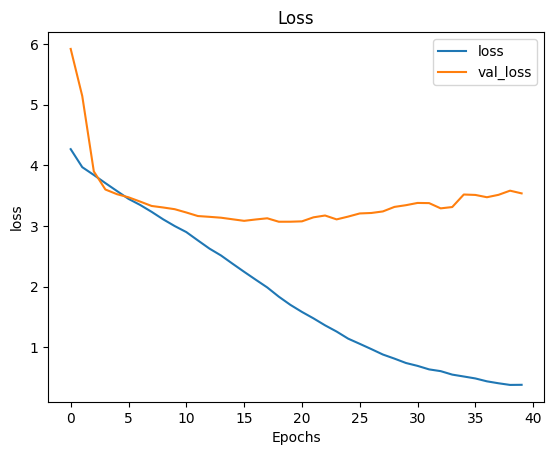

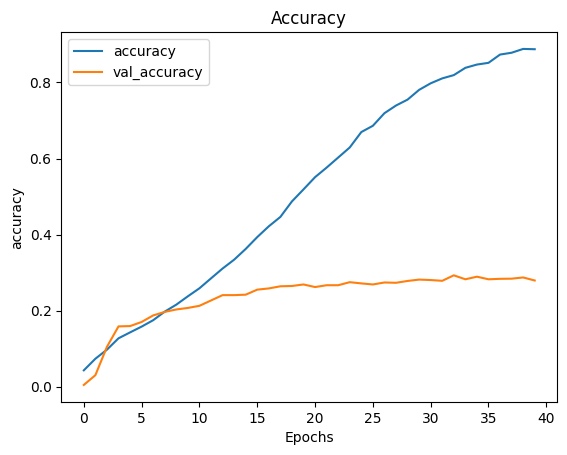

98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - Top2: 0.3715 - accuracy: 0.2660 - loss: 3.6830
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step


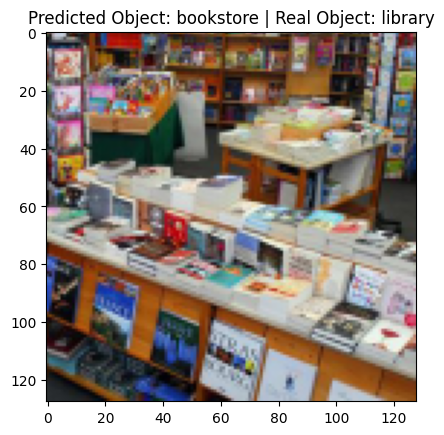

In [ ]:
model_learn_rate = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model_learn_rate.summary()
model_learn_rate.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_learn_rate, batch_size, 40)

In [ ]:
# predict(model_learn_rate, 64, 300)


In [ ]:
model_learn_rate.save('model_learn_rate.keras')

# Model 1

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,227 (2.49 MB)

 Trainable params: 651,331 (2.48 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - Top2: 0.0876 - accuracy: 0.0504 - loss: 4.5070 - val_Top2: 0.0345 - val_accuracy: 0.0212 - val_loss: 14.5799
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - Top2: 0.1390 - accuracy: 0.0732 - loss: 3.8726 - val_Top2: 0.0709 - val_accuracy: 0.0228 - val_loss: 13.8346
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - Top2: 0.1506 - accuracy: 0.0828 - loss: 3.7852 - val_Top2: 0.0405 - val_accuracy: 0.0220 - val_loss: 10.0630
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - Top2: 0.1650 - accuracy: 0.0921 - loss: 3.7070 - val_Top2: 0.1451 - val_accuracy: 0.0770 - val_loss: 4.0877
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - Top2: 0.1816 - accuracy: 0.0975 - loss: 3.6442 - val_Top2: 0.1647 - val_accuracy: 0.0910 - val_loss: 4.2947
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - Top2: 0.1974 - accuracy: 0.1078 - loss: 3.6013 - val_Top2: 0.2136 - val_accuracy: 0.1158 - val_loss: 3.5475
Epoch 7/40
156/156 

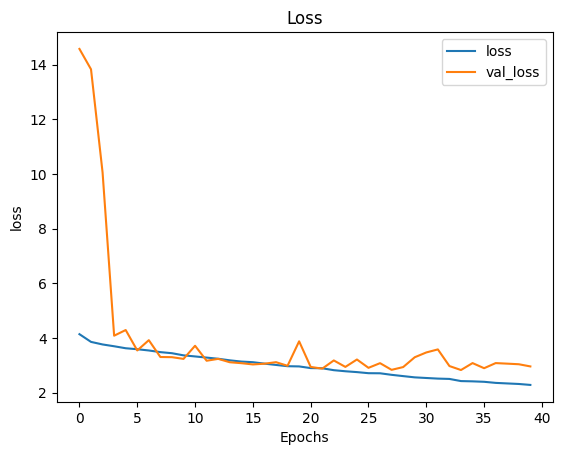

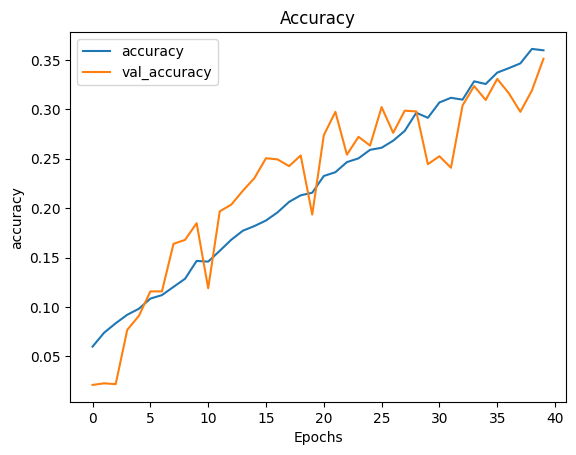

98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - Top2: 0.4361 - accuracy: 0.3063 - loss: 2.9627
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step


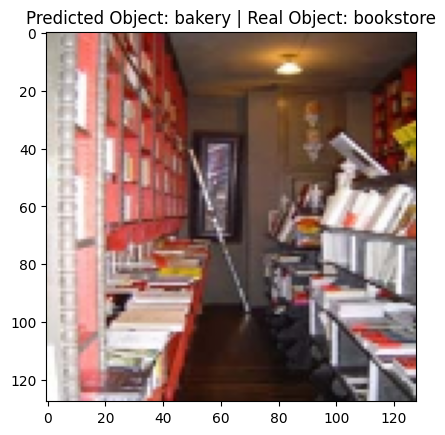

In [ ]:
model1 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model1, batch_size, 40)

# Model

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 67)             │        17,21

 Total params: 855,235 (3.26 MB)

 Trainable params: 853,891 (3.26 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - Top2: 0.0751 - accuracy: 0.0393 - loss: 4.7185 - val_Top2: 0.0545 - val_accuracy: 0.0413 - val_loss: 10.3623
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - Top2: 0.1196 - accuracy: 0.0604 - loss: 4.0260 - val_Top2: 0.0605 - val_accuracy: 0.0373 - val_loss: 9.3089
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - Top2: 0.1459 - accuracy: 0.0802 - loss: 3.8680 - val_Top2: 0.1435 - val_accuracy: 0.0866 - val_loss: 3.9293
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - Top2: 0.1584 - accuracy: 0.0875 - loss: 3.7909 - val_Top2: 0.1876 - val_accuracy: 0.1074 - val_loss: 3.8534
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - Top2: 0.1793 - accuracy: 0.0960 - loss: 3.6901 - val_Top2: 0.1623 - val_accuracy: 0.0942 - val_loss: 3.8652
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - Top2: 0.1961 - accuracy: 0.1044 - loss: 3.6272 - val_Top2: 0.2285 - val_accuracy: 0.1230 - val_loss: 3.5838
Epoch 7/40
156/156 ━━

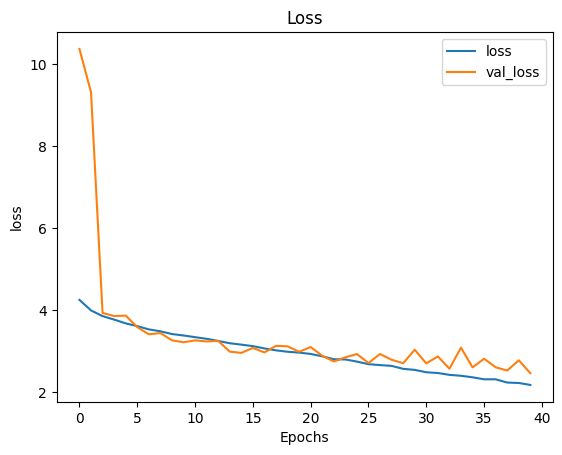

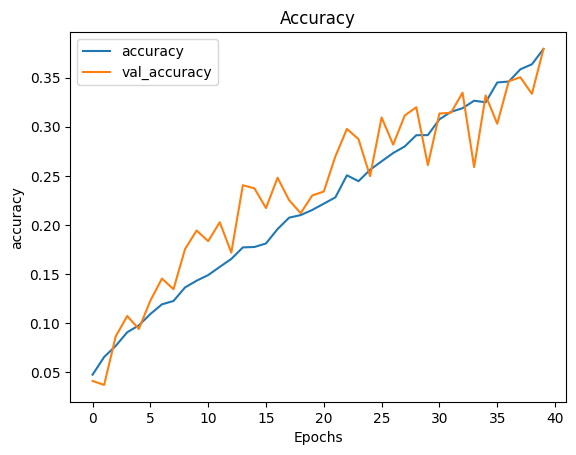

98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - Top2: 0.4831 - accuracy: 0.3485 - loss: 2.5230
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step


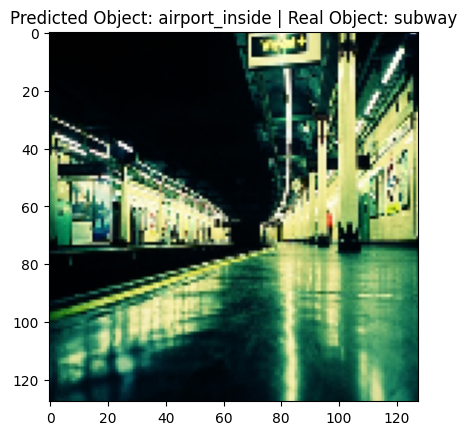

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, batch_size, 40)

# Model 2

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 128)      │             

 Total params: 1,640,995 (6.26 MB)

 Trainable params: 1,638,691 (6.25 MB)

 Non-trainable params: 2,304 (9.00 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - Top2: 0.0845 - accuracy: 0.0460 - loss: 4.6237 - val_Top2: 0.0862 - val_accuracy: 0.0413 - val_loss: 4.8217
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 482s 3s/step - Top2: 0.1263 - accuracy: 0.0678 - loss: 3.9622 - val_Top2: 0.0914 - val_accuracy: 0.0501 - val_loss: 5.8793
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step - Top2: 0.1368 - accuracy: 0.0680 - loss: 3.8424 - val_Top2: 0.1214 - val_accuracy: 0.0669 - val_loss: 4.2402
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 481s 3s/step - Top2: 0.1433 - accuracy: 0.0763 - loss: 3.7955 - val_Top2: 0.1679 - val_accuracy: 0.0934 - val_loss: 3.8559
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 478s 3s/step - Top2: 0.1628 - accuracy: 0.0907 - loss: 3.7396 - val_Top2: 0.1988 - val_accuracy: 0.1078 - val_loss: 3.6876
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - Top2: 0.1851 - accuracy: 0.1001 - loss: 3.6710 - val_Top2: 0.2084 - val_accuracy: 0.1210 - val_loss: 3.5723
Epoch 7/40
156/156 ━━━

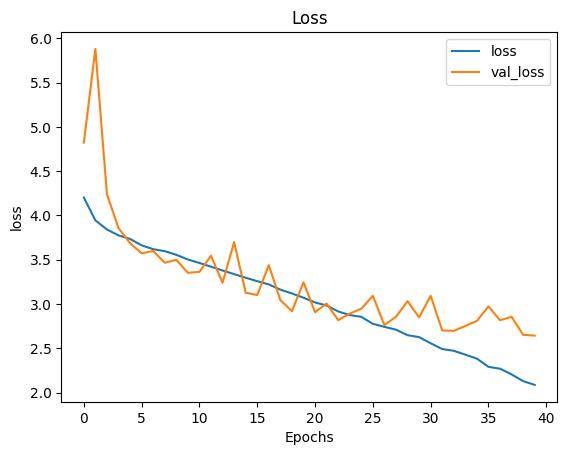

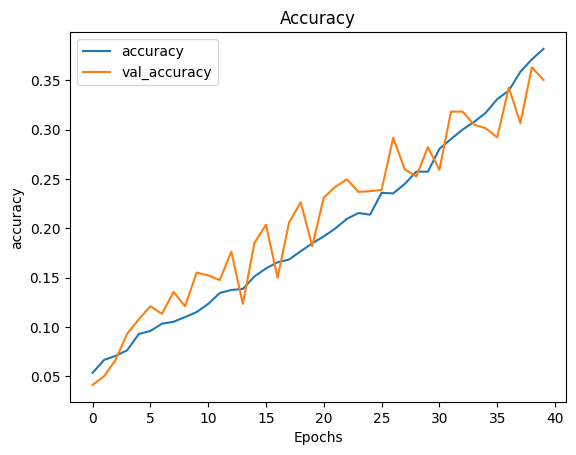

98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - Top2: 0.4587 - accuracy: 0.3370 - loss: 2.7260
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 246ms/step


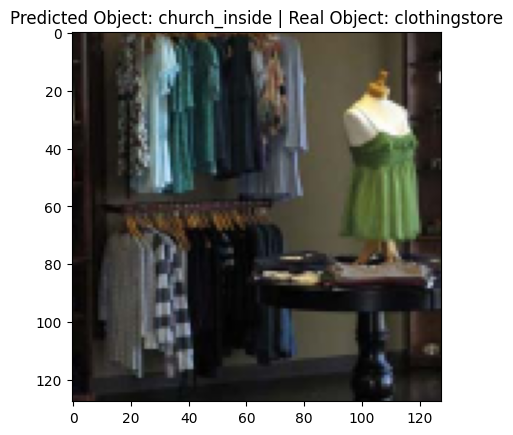

In [ ]:
model2 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model2.summary()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model2, batch_size, 40)

# Model 3

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 67)             │        34,371 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931,779 (3.55 MB)

 Trainable params: 930,883 (3.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - Top2: 0.0897 - accuracy: 0.0507 - loss: 5.1113 - val_Top2: 0.0325 - val_accuracy: 0.0132 - val_loss: 22.3771
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - Top2: 0.1555 - accuracy: 0.0900 - loss: 3.8277 - val_Top2: 0.0353 - val_accuracy: 0.0132 - val_loss: 22.7730
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - Top2: 0.1846 - accuracy: 0.1048 - loss: 3.6579 - val_Top2: 0.0934 - val_accuracy: 0.0417 - val_loss: 6.5329
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - Top2: 0.2231 - accuracy: 0.1270 - loss: 3.5253 - val_Top2: 0.2537 - val_accuracy: 0.1579 - val_loss: 3.5610
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - Top2: 0.2260 - accuracy: 0.1270 - loss: 3.4601 - val_Top2: 0.2625 - val_accuracy: 0.1571 - val_loss: 3.3445
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - Top2: 0.2426 - accuracy: 0.1410 - loss: 3.4017 - val_Top2: 0.3014 - val_accuracy: 0.1832 - val_loss: 3.2177
Epoch 7/40
156/156 ━

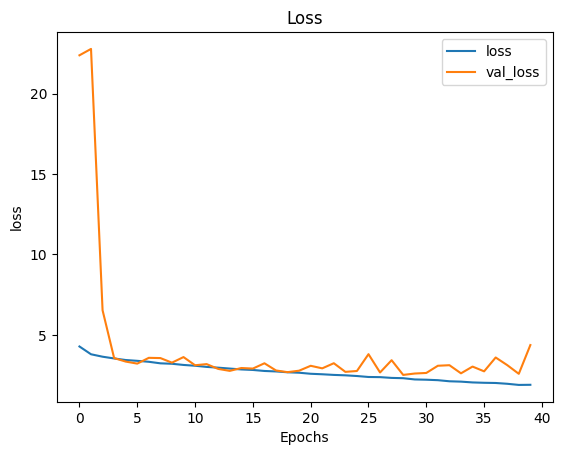

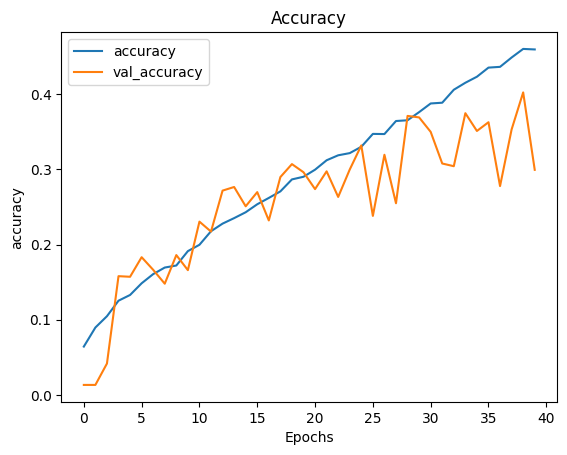

98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - Top2: 0.4104 - accuracy: 0.2788 - loss: 4.4405
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step


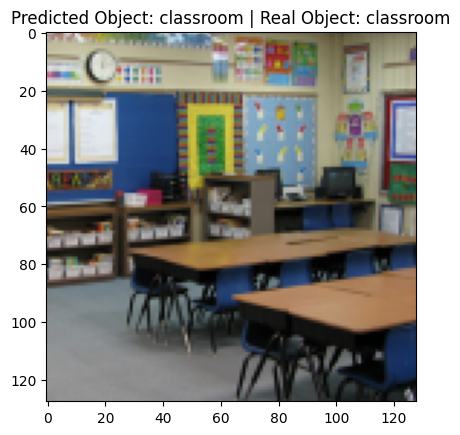

In [ ]:
model3 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model3, batch_size, 40)

# Model 4

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 67)             │        34,371 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,961,923 (129.55 MB)

 Trainable params: 33,961,027 (129.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 481s 3s/step - Top2: 0.0682 - accuracy: 0.0328 - loss: 9.4804 - val_Top2: 0.0717 - val_accuracy: 0.0321 - val_loss: 4.2839
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - Top2: 0.0870 - accuracy: 0.0412 - loss: 4.1620 - val_Top2: 0.0585 - val_accuracy: 0.0208 - val_loss: 4.6751
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - Top2: 0.0891 - accuracy: 0.0441 - loss: 4.1227 - val_Top2: 0.0709 - val_accuracy: 0.0265 - val_loss: 4.1975
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - Top2: 0.0826 - accuracy: 0.0377 - loss: 4.0945 - val_Top2: 0.0681 - val_accuracy: 0.0277 - val_loss: 4.1125
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - Top2: 0.0932 - accuracy: 0.0471 - loss: 4.0661 - val_Top2: 0.0770 - val_accuracy: 0.0465 - val_loss: 4.0663
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - Top2: 0.0897 - accuracy: 0.0473 - loss: 4.0445 - val_Top2: 0.0798 - val_accuracy: 0.0473 - val_loss: 4.0472
Epoch 7/40
156/156 ━━━

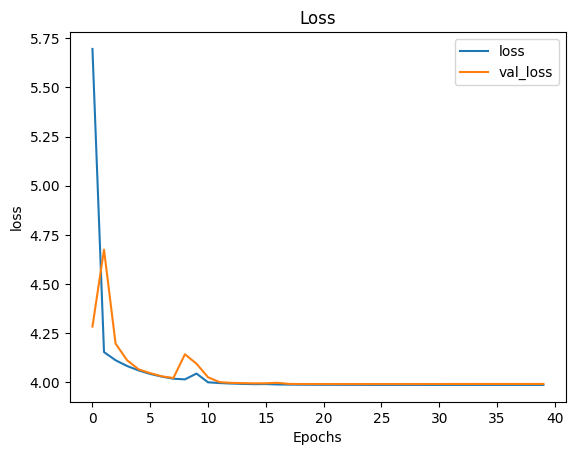

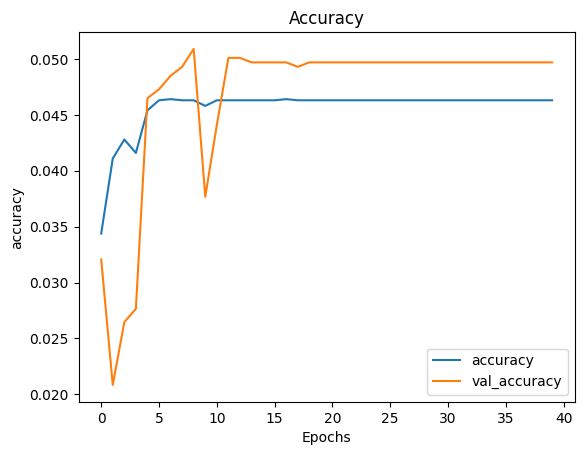

98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - Top2: 0.0942 - accuracy: 0.0502 - loss: 4.0062
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step


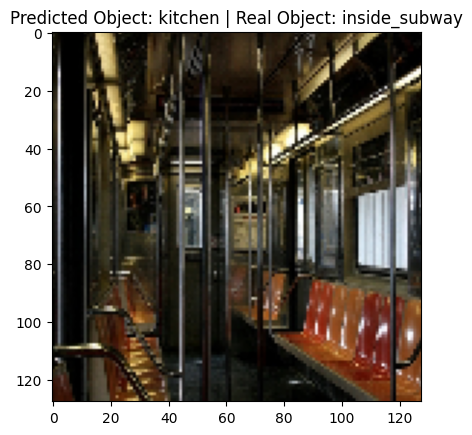

In [ ]:
model4 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model4.summary()
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model4, batch_size, 40)

# Model 5

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 67)             │        68,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649,347 (13.92 MB)

 Trainable params: 3,647,555 (13.91 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 492s 3s/step - Top2: 0.0965 - accuracy: 0.0544 - loss: 5.9636 - val_Top2: 0.0200 - val_accuracy: 0.0132 - val_loss: 18.2893
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 476s 3s/step - Top2: 0.1719 - accuracy: 0.0923 - loss: 3.7870 - val_Top2: 0.0441 - val_accuracy: 0.0132 - val_loss: 20.2880
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 478s 3s/step - Top2: 0.2016 - accuracy: 0.1099 - loss: 3.6090 - val_Top2: 0.0790 - val_accuracy: 0.0289 - val_loss: 6.6943
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - Top2: 0.2220 - accuracy: 0.1275 - loss: 3.4966 - val_Top2: 0.2725 - val_accuracy: 0.1703 - val_loss: 3.3757
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - Top2: 0.2441 - accuracy: 0.1422 - loss: 3.4019 - val_Top2: 0.2337 - val_accuracy: 0.1471 - val_loss: 3.5292
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 477s 3s/step - Top2: 0.2573 - accuracy: 0.1448 - loss: 3.3475 - val_Top2: 0.2806 - val_accuracy: 0.1739 - val_loss: 3.2737
Epoch 7/40
156/156 ━

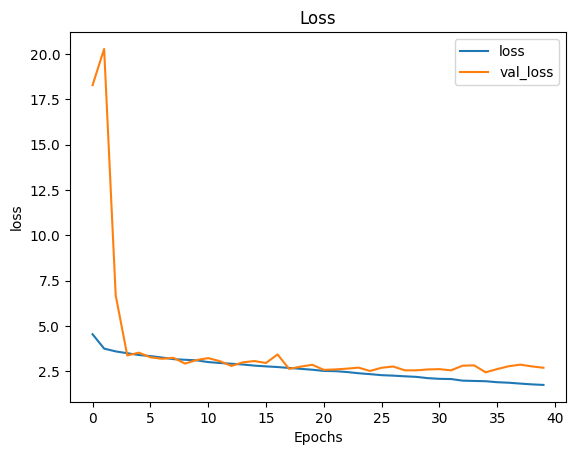

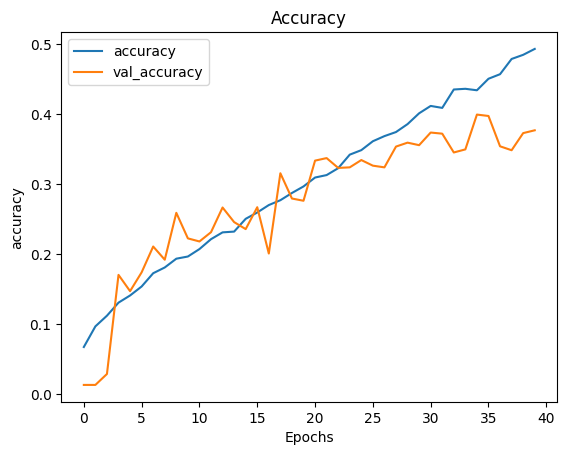

98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - Top2: 0.4980 - accuracy: 0.3720 - loss: 2.6463
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step


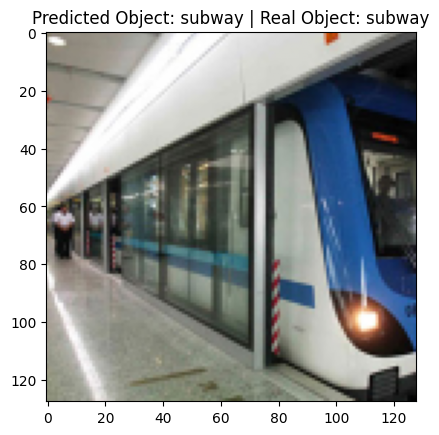

In [ ]:
model5 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.3),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model5.summary()
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model5, batch_size, 40)

In [ ]:
# predict(model5, 64, 30)
# model5.save('model5_2.keras')


In [ ]:
# model5.save('model5.keras')

# Model 6

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 67)             │        34,371 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,504,643 (9.55 MB)

 Trainable params: 2,503,747 (9.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - Top2: 0.0837 - accuracy: 0.0463 - loss: 5.3804 - val_Top2: 0.0553 - val_accuracy: 0.0297 - val_loss: 20.7752
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - Top2: 0.1507 - accuracy: 0.0890 - loss: 3.9177 - val_Top2: 0.0561 - val_accuracy: 0.0172 - val_loss: 14.7711
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - Top2: 0.1644 - accuracy: 0.0902 - loss: 3.7956 - val_Top2: 0.0954 - val_accuracy: 0.0433 - val_loss: 8.7286
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - Top2: 0.1895 - accuracy: 0.1040 - loss: 3.6512 - val_Top2: 0.2240 - val_accuracy: 0.1242 - val_loss: 3.6198
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - Top2: 0.2032 - accuracy: 0.1167 - loss: 3.5971 - val_Top2: 0.2701 - val_accuracy: 0.1699 - val_loss: 3.3680
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - Top2: 0.2167 - accuracy: 0.1325 - loss: 3.5368 - val_Top2: 0.2649 - val_accuracy: 0.1575 - val_loss: 3.3978
Epoch 7/40
156/156 ━

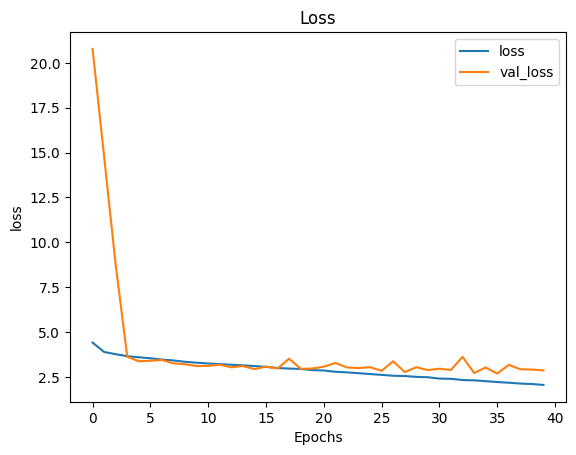

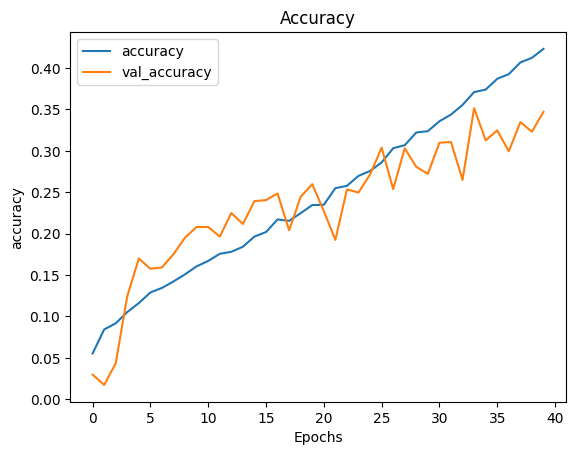

98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - Top2: 0.4512 - accuracy: 0.3196 - loss: 2.8821
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step


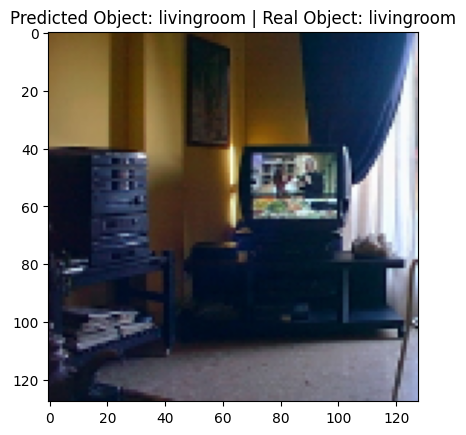

In [ ]:
model6 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 3),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 3),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(67, activation='softmax')
    ]
)

model6.summary()
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model6, batch_size, 40)